# Assignment 1: Python Basics

## Q1. Document Term Matrix
1. Define a function called <b>compute_dtm</b> as follows:
   * Take a list of documents, say <b>$docs$</b> as a parameter
   * Tokenize each document into <b>lower-cased words without any leading and trailing punctuations</b> (Hint: you can refer to the solution to the Review Exercise at the end of Python_II lecture notes)
   * Let $words$ denote the list of unique words in $docs$
   * Compute $dtm$ (i.e. <b>document-term matrix</b>), which is a 2-dimensional array created from the documents as follows:
       * Each row (say $i$ ) represents a document
       * Each column (say $j$) represents a unique word in $words$
       * Each cell $(i,j)$ is the count of word $j$ in document $i$. Fill 0 if word $j$ does not appear in document $i$
   * Return $dtm$ and $words$. 


## Q2. Performance Analysis

1. Suppose your machine learning model returns a one-dimensional array of probabilities as the output. Write a function "performance_analysis" to do the following:
    - Take three input parameters: probability array, ground-truth label array, and a <b>threshold</b> $th$
    - If a <b>probability > $th$, the prediction is positive; otherwise, negative</b>
    - Compare the predictions with the ground truth labels to calculate the <b>confusion matrix</b> as shown in the figure, where:
    <img src="confusion.png" width="50%">
        * True Positives (<b>TP</b>): the number of correct positive predictions
        * False Positives (<b>FP</b>): the number of postive predictives which actually are negatives
        * True Negatives (<b>TN</b>): the number of correct negative predictions
        * False Negatives (<b>FN</b>): the number of negative predictives which actually are positives
    - Calculate <b>precision</b> as $TP/(TP+FP)$ and <b>recall</b> as $TP/(TP+FN)$
    - Return the confusion matrix, precision, and recall
2. Call this function with $th$ set to 0.5, print out confusion matrix, precision, and recall
3. Call this function with $th$ varying from 0.05 to 1 with an increase of 0.05. Plot a line chart to see how precision and recall change by $th$. Observe how precision and recall change by $th$.

## Q3 (Bonus): Class 
1. Define a function called DTM as follows:
     * A list of documents, say $docs$, is passed to inialize a DTM object. The \_\_init\_\_ function creates two attributes:
        - an attribute called $words$, which saves a list of unique words in the documents
        - an attribute called $dtm$, which saves the document-term matrix returned by calling the function defined in Q1.
     * This class contains two methods:
        - $max\_word\_freq()$: returns the word with the <b>maximum total count</b> in the entire corpus. 
        - $max\_word\_df()$: returns the word with the <b>largest document frequency</b>, i.e. appear in the most of the documents. 

Note: 
* <b>Do not use any text mining package like NLTK or sklearn in this assignment</b>. You only need basic packages such as numpy and pandas
* Try to apply array broadcasting whenever it is possible.

## Submission Guideline##
- Following the solution template provided below. Use __main__ block to test your functions and class
- Save your code into a python file (e.g. assign1.py) that can be run in a python 3 environment. In Jupyter Notebook, you can export notebook as .py file in menu "File->Download as".
- Make sure you have all import statements. To test your code, open a command window in your current python working folder, type "python assign1.py" to see if it can run successfully.
- For more details, check assignment submission guideline on Canvas

In [6]:
import numpy as np
import pandas as pd
import string
from matplotlib import pyplot as plt


In [7]:
# Q1

def compute_dtm(docs):
    dtm = None
    # add your code here
    doc = []
    for item in docs:
        talk = item.split()
        talk = [tom.strip(string.punctuation).lower() for tom in talk]
        doc.append(talk)
        
    words = []
    for item in doc:
        for word in item:
            if word not in words:
                words.append(word)
   
    df = pd.DataFrame(columns = words)
    for item in words:
        df[item] = [float(lis.count(item)) for lis in doc]
    dtm = df.values
    return dtm, words


In [8]:
#Q2
def evaluate_performance(prob, truth, th):
    
    conf, prec, rec = None, None, None
    prediction = (prob>th).astype(int)
    N = 0
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    while N < len(truth):
        if truth[N] == 1:
            if prediction[N] == 1:
                TP += 1
            else:
                FN += 1
        else:
            if prediction[N] == 1:
                FP += 1
            else:
                TN += 1
        N += 1

    conf = np.array([[TN,FN],[FP,TP]]) 
    conf = pd.DataFrame(conf)
    conf.index.name = 'pred'
    conf.columns.name = 'truth'
    prec = TP/(TP+FP)
    rec = TP/(TP+FN)
    return conf, prec, rec

In [9]:
# Q3

class DTM(object):
    def __init__(self,docs):
        self.words = compute_dtm(docs)[1]
        self.dtm = compute_dtm(docs)[0]
        
    def max_word_freq(self):
        df = pd.DataFrame(dtm,columns = words).T
        df['count'] = df.sum(axis = 1)
        df = df.reset_index()
        return df.sort_values(by = 'count',ascending = False).iloc[0,0]
    
    def max_word_df(self):
        df = pd.DataFrame(dtm,columns = words).T
        col = df.columns.values.tolist()
        df = df.reset_index()
        return df.sort_values(by = col,ascending = False).iloc[0,0]    

['sure', 'a', 'computer', 'can', 'match', 'two', 'strings', 'and', 'tell', 'you', 'whether', 'they', 'are', 'same', 'or', 'not', 'but', 'how', 'do', 'we', 'make', 'computers', 'about', 'football', 'ronaldo', 'when', 'search', 'for', 'messi', 'understand', 'that', 'apple', 'in', 'is', 'tasty', 'fruit', 'be', 'eaten', 'company']
(3, 39)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1.]]

Q2:
truth   0   1
pred         
0      37   2
1       1  10
0.9090909090909091 0.8333333333333334

Q3:
Word with the maximum total count:  a
Word with the most frequent document frequency:  you


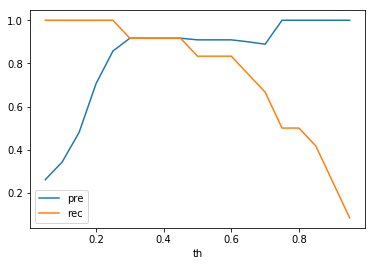

In [12]:
# best practice to test your class
# if your script is exported as a module,
# the following part is ignored
# this is equivalent to main() in Java

if __name__ == "__main__":  
    
    # Test Question 1
    docs = ['Sure, a computer can match two strings and tell you whether they are same or not.', 
            'But how do we make computers tell you about football or Ronaldo when you search for Messi?', 
            'How do you make a computer understand that "Apple" in "Apple" is a tasty fruit" is a fruit that can be eaten and not a company?']
    
    dtm, words = compute_dtm(docs)
    print(words)
    print(dtm.shape)
    print(dtm)
    
    # Test Question 2  
    prob =np.array([0.28997326, 0.10166073, 0.10759583, 0.0694934 , 0.6767239 ,
       0.01446897, 0.15268748, 0.15570522, 0.12159665, 0.22593857,
       0.98162019, 0.47418329, 0.09376987, 0.80440782, 0.88361167,
       0.21579844, 0.72343069, 0.06605903, 0.15447797, 0.10967575,
       0.93020135, 0.06570391, 0.05283854, 0.09668829, 0.05974545,
       0.04874688, 0.07562255, 0.11103822, 0.71674525, 0.08507381,
       0.630128  , 0.16447478, 0.16914903, 0.1715767 , 0.08040751,
       0.7001173 , 0.04428363, 0.19469664, 0.12247959, 0.14000294,
       0.02411263, 0.26276603, 0.11377073, 0.07055441, 0.2021157 ,
       0.11636899, 0.90348488, 0.10191679, 0.88744523, 0.18938904])

    truth = np.array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0])
    
    # test the function with threshold 0.5
    print("\nQ2:")
    th = 0.5
    conf, prec, rec = evaluate_performance(prob, truth, th)
    print(conf)
    print(prec, rec)
    
    # add code to print the line chart
    th_array = np.arange(0.05,1,0.05)
    df_th = pd.DataFrame(index = th_array)
    pre = []
    rec = []
    for th_ in th_array:
        pre.append(evaluate_performance(prob, truth, th_)[1])
        rec.append(evaluate_performance(prob, truth, th_)[2])
    df_th['th'] = th_array
    df_th['pre'] = np.array(pre)
    df_th['rec'] = np.array(rec)
    df_th.plot(kind = 'line',x = 'th',y = ['pre','rec'])
    # Test Question 3
    docs_dtm = DTM(docs)
    
    print("\nQ3:")
    print("Word with the maximum total count: ", docs_dtm.max_word_freq())
    print("Word with the most frequent document frequency: ", docs_dtm.max_word_df())